In [1]:
from tensorflow.keras.layers import Dense  # ← 匯入 Keras 的密集層類別
from tensorflow.keras.models import Sequential  # ← 匯入 Keras 的序列式模型類別
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
import sys
import numpy as np

In [2]:
(train2_images, train2_labels), (test2_images, test2_labels) = mnist.load_data()

In [3]:
print(sys.version)  #打印出我們現在使用的Python版本
print(tf.__version__) #打印出tensorflow版本號
cwd = os.getcwd() #獲得現在所在的檔案路徑
print(cwd)
os.chdir('/Users/luruishan') #變更現在所在的檔案路徑成為 /Users/luruishan，同學練習時可以改為"D:\"
print(os.getcwd()) #重新獲得一次現在所在的檔案路徑

3.8.8 (v3.8.8:024d8058b0, Feb 19 2021, 08:48:17) 
[Clang 6.0 (clang-600.0.57)]
2.4.1
/Users/luruishan/Downloads/德明教學與行政/教材與考題/F0380_Tensorflow_Keras教材/ch01
/Users/luruishan


In [4]:
# 載入 MNIST 資料集

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

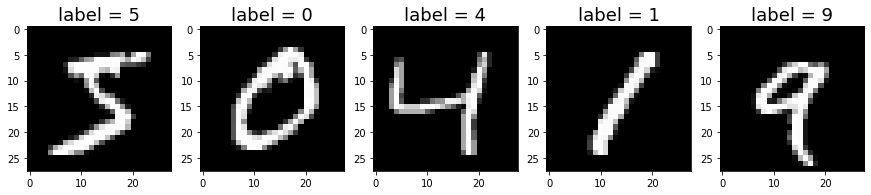

In [6]:
# 畫出手寫數字圖片

plt.gcf().set_size_inches(15, 4)  # ←設定圖形的寬和高 (英吋)
for i in range(5):
    ax = plt.subplot(1, 5, 1+i)  # ←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(train_images[i], cmap='gray')  # ←顯示灰階圖片(黑底白字)
    ax.set_title('label = '+str(train_labels[i]), fontsize=18)  # ←設定標題
plt.show()  # 將圖形顯示出來

In [7]:
# 預處理訓練資料
# ←將 (60000,28,28) 轉換成 (60000,784)
x_train = train_images.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255  # ←再將 0~255 的像素值轉換成 0~1 的浮點數

x_test = test_images.reshape((10000, 28 * 28))  # }←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255  # }
print(x_train.shape)
print(x_train[0].shape)

(60000, 784)
(784,)


In [ ]:
# 預處理標籤資料

y_train = to_categorical(train_labels)  # ←將標籤做 One-hot 編碼
y_test = to_categorical(test_labels)  # ←將測試做 One-hot 編碼


In [ ]:
# 程 建立多元分類模型

model = Sequential()  # ← 建立序列模型物件
model.add(Dense(512, activation='relu', input_dim=784))  # ← 加入第一層
model.add(Dense(10, activation='softmax'))  # ← 加入第二層
model.compile(optimizer='rmsprop',  # ← 指定優化器
              loss='categorical_crossentropy',  # ← 指定損失函數
              metrics=['acc'])  # ← 指定評量準則

In [ ]:
model.summary()

In [ ]:
# 程 訓練模型
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)  # ←使用測試樣本及標籤來評估普適能力
print('對測試資料集的準確率：', test_acc)

In [ ]:
model.input

In [ ]:
plt.imshow(test_images[0])

In [ ]:
# ←用測試樣本進行預測 傳入值必須有批次範圍 可以單張圖片 但是要以批次迭代表示法 例如：x_test[0:1] 來表示單張圖片
# predict = model.predict_classes(x_test[0:1]) 已廢棄過時不要用
predict =np.argmax(model.predict(x_test[0:1]), axis=-1)
predict2 = model.predict(x_test[0:1])
print(predict)
print(predict2)
print(np.argmax(predict2))


In [ ]:
# 程 畫出測試圖片並標示預測結果與標準答案

predict = model.predict_classes(x_test)  # ←用測試樣本進行預測
predict2 = model.predict(x_test)

plt.gcf().set_size_inches(15, 4)  # ←設定圖形的尺吋
for i in range(5):
    ax = plt.subplot(1, 5, 1+i)  # ←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(test_images[i], cmap='binary')  # ←顯示灰階圖片
    ax.set_title('label = '+str(test_labels[i]) +
                 '\npredi = '+str(predict[i]), fontsize=18)  # ←設定標題
    ax.set_xticks([])
    ax.set_yticks([])  # ←X, Y 軸不顯示刻度
plt.show()  # ←將圖形顯示出來

In [ ]:
# 程 將模型存檔
model.save('MnistModel.h5')   #← 將模型以指定的檔名存檔


In [ ]:
print(predict.shape)
print(test_labels.shape)

In [ ]:
#做出 測試集的預測結果與原始標籤的交叉比對表 共10000筆資料
import pandas as pd
pd.crosstab(test_labels, predict,rownames=["label"], colnames=["predict"])

In [ ]:
# 預測結果與原始標籤的交叉比對表 輸出為html檔
crosstab_result = pd.crosstab(test_labels, predict,rownames=["label"], colnames=["predict"])
crosstab_result.to_html("mnist_crosstab.html")